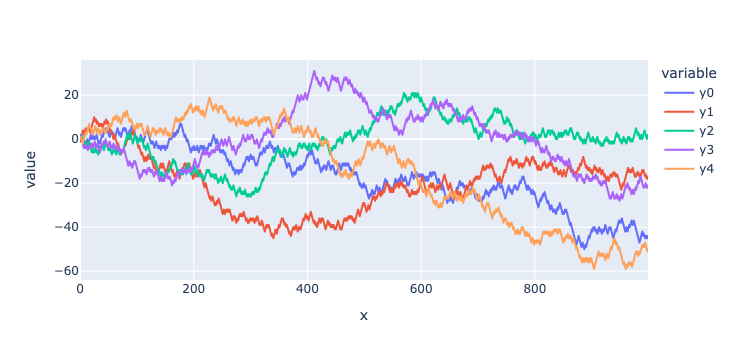

In [1]:
import random
import numpy as np
import plotly.express as px

def simulate_1d_rw(nsteps=1000, p=0.5, stepsize=1):
    steps = [ 1*stepsize if random.random() < p else -1*stepsize for i in range(nsteps) ]
    y = np.cumsum(steps)
    x = list(range(len(y)))

    return x, list(y)

simulation_data = {}
nsims = 5
for i in range(nsims):
    x, y = simulate_1d_rw()
    simulation_data['x'] = x
    simulation_data['y{col}'.format(col=i)] = y

ycols = [ 'y{col}'.format(col=i) for i in range(nsims) ]
fig = px.line(simulation_data, x='x', y=ycols)
fig.show()

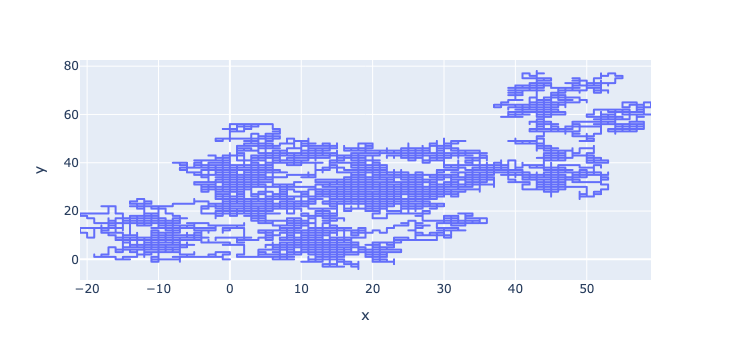

In [2]:
import random
import numpy as np
import plotly.express as px

def simulate_2d(nsteps=10000, stepsize=1):

    deltas = [ (0,-1*stepsize), (-1*stepsize,0), (0,1*stepsize), (1*stepsize,0) ]

    steps = [ list(random.choice(deltas)) for i in range(nsteps) ]
    steps = np.array(steps)
    steps = np.cumsum(steps,axis=0)
    y = list(steps[:,1])
    x = list(steps[:,0])

    return x, y

x, y = simulate_2d()
fig = px.line({ 'x' : x, 'y' : y }, x='x', y='y')
fig.show()

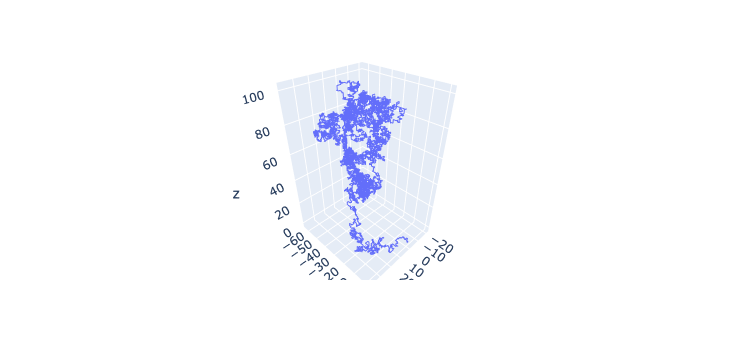

In [3]:
import random
import numpy as np
import plotly.express as px

def simulate_3d_rw(nsteps=10000, stepsize=1):

    deltas = [ (0,0,-1*stepsize), (0,-1*stepsize,0), (-1*stepsize,0,0),\
               (0,0,1*stepsize), (0,1*stepsize,0), (1*stepsize,0,0) ]

    steps = [ list(random.choice(deltas)) for i in range(nsteps) ]
    steps = np.array(steps)
    steps = np.cumsum(steps,axis=0)
    z = list(steps[:,2])
    y = list(steps[:,1])
    x = list(steps[:,0])

    return x, y, z

x, y, z = simulate_3d_rw()
fig = px.line_3d({ 'x' : x, 'y' : y, 'z' : z }, x='x', y='y', z='z')
fig.show()

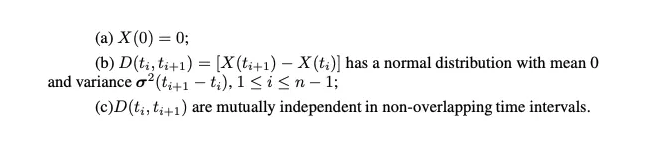

In [4]:
import random
import numpy as np
import plotly.express as px

def simulate_1d_bm(nsteps=1000, t=0.01):
    steps = [ np.random.randn()*np.sqrt(t) for i in range(nsteps) ]
    y = np.cumsum(steps)
    x = [ t*i for i in range(nsteps) ]
    return x, y

nsims = 5
simulation_data = {}
for i in range(nsims):
    x, y = simulate_1d_bm()
    simulation_data['y{col}'.format(col=i)] = y
    simulation_data['x'] = x

ycols = [ 'y{col}'.format(col=i) for i in range(nsims) ]
fig = px.line(simulation_data, x='x', y=ycols)
fig.show()

In [5]:
import random
import numpy as np
import plotly.express as px

def simulate_2d_bm(nsteps=1000, t=0.01):
    x = np.cumsum([ np.random.randn()*np.sqrt(t) for i in range(nsteps) ])
    y = np.cumsum([ np.random.randn()*np.sqrt(t) for i in range(nsteps) ])
    return list(x), list(y)

x, y = simulate_2d_bm()
fig = px.line({ 'x' : x, 'y' : y }, x='x', y='y')
fig.show()

In [6]:
import random
import numpy as np
import plotly.express as px

def simulate_3d_bm(nsteps=10000, t=0.01):
    x = np.cumsum([ np.random.randn()*np.sqrt(t) for i in range(nsteps) ])
    y = np.cumsum([ np.random.randn()*np.sqrt(t) for i in range(nsteps) ])
    z = np.cumsum([ np.random.randn()*np.sqrt(t) for i in range(nsteps) ])
    return list(x), list(y), list(z)

x, y, z = simulate_3d_bm()
fig = px.line_3d({ 'x' : x, 'y' : y, 'z' : z }, x='x', y='y', z='z')
fig.show()

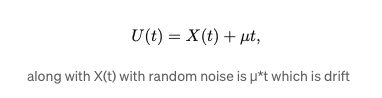

In [7]:
import random
import numpy as np
import plotly.express as px

def simulate_1d_bm_with_drift(nsteps=1000, t=0.01, mu=0.5):
    steps = [ mu*0.01 + np.random.randn()*np.sqrt(t) for i in range(nsteps) ]
    y = np.cumsum(steps)
    x = [ t*i for i in range(nsteps) ]
    return x, y

nsims = 5
simulation_data = {}
for i in range(nsims):
    x, y = simulate_1d_bm_with_drift()
    simulation_data['y{col}'.format(col=i)] = y
    simulation_data['x'] = x

ycols = [ 'y{col}'.format(col=i) for i in range(nsims) ]
fig = px.line(simulation_data, x='x', y=ycols)
fig.show()

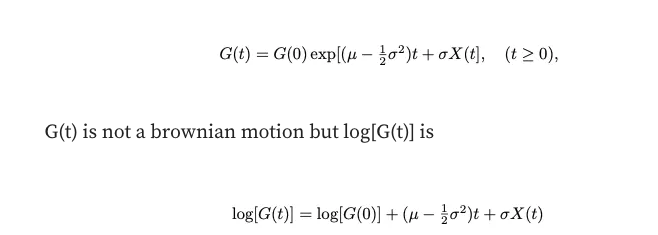

In [8]:
import random
import numpy as np
import plotly.express as px

def simulate_1d_gbm(nsteps=1000, t=1, mu=0.0001, sigma=0.02):
    steps = [ (mu - (sigma**2)/2) + np.random.randn()*sigma for i in range(nsteps) ]
    y = np.exp(np.cumsum(steps))
    x = [ t*i for i in range(nsteps) ]
    return x, y

nsims = 5
simulation_data = {}
for i in range(nsims):
    x, y = simulate_1d_gbm()
    simulation_data['y{col}'.format(col=i)] = y
    simulation_data['x'] = x

ycols = [ 'y{col}'.format(col=i) for i in range(nsims) ]
fig = px.line(simulation_data, x='x', y=ycols)
fig.show()

In [12]:
import pandas_datareader.data as web
import numpy as np
import plotly.express as px
import random

def simulate_1d_gbm(nsteps=1000, t=1, mu=0.0001, sigma=0.02, start=1):
    steps = [ (mu - (sigma**2)/2) + np.random.randn()*sigma for i in range(nsteps) ]
    y = start*np.exp(np.cumsum(steps))
    x = [ t*i for i in range(nsteps) ]
    return x, y

df = web.DataReader('^DJI', 'stooq')
mask = ( '2022-01-01' <= df.index ) & ( df.index <= '2022-12-31' )
df = df[mask]
prices = np.flip(df['Close'].values)

logprices = np.log(prices)
logreturns = logprices[1:] - logprices[:-1]
mu = np.mean(logreturns)
sigma = np.std(logreturns)
nsteps = logprices.shape[0]

x, y = simulate_1d_gbm(nsteps=nsteps, mu=mu, sigma=sigma, start=prices[0])

data = {}
data['x'] = x
data['Simulation'] = y
data['DowJonesIndex'] = prices

fig = px.line(data,x='x', y=['DowJonesIndex', 'Simulation'])
fig.show()

ModuleNotFoundError: No module named 'pandas_datareader'

In [3]:

import numpy as np
import plotly.express as px
import random

from datetime import datetime
from scipy import stats
import pandas as pd
import numpy as np
from cryptotoolbox.realtime import realtime_plotting_utility
from cryptotoolbox.binanceutils import binanceutils
from datetime import datetime, timedelta

def simulate_1d_gbm(nsteps=1000, t=1, mu=0.0001, sigma=0.02, start=1):
    steps = [ (mu - (sigma**2)/2) + np.random.randn()*sigma for i in range(nsteps) ]
    y = start*np.exp(np.cumsum(steps))
    x = [ t*i for i in range(nsteps) ]
    return x, y


refetch_daily_price = True
daily_crypto_starting_day = '2017-01-01'
daily_crypto_starting_date = datetime.strptime(daily_crypto_starting_day, '%Y-%m-%d')
starting_date = daily_crypto_starting_date
running_date = datetime.now()
local_root_directory = '/Users/stefanduprey/Documents/My_Data/My_GeometricBrownianMotion/'
if refetch_daily_price:
    print(f'refetching daily price')
    aggregated_df = None
    for me_symb, me_against in [['BTC', 'USDT']]:
        print(f'requesting {me_symb}{me_against}')
        api_key = '***'
        api_secret = '****'
        data_df = binanceutils.fetch_binance_ohlc(symbol=f'{me_symb}{me_against}',
                                                  frequence='1d',
                                                  public_key=api_key,
                                                  private_key=api_secret,
                                                  start_time=daily_crypto_starting_date,
                                                  end_time=running_date,
                                                  local_root_directory=local_root_directory,
                                                  recompute_all=True)

        data_df = data_df.rename(columns={'close': f'close_{me_symb}_{me_against}'})
        data_df = data_df.rename(columns={'open': f'open_{me_symb}_{me_against}'})
        data_df = data_df.rename(columns={'high': f'high_{me_symb}_{me_against}'})
        data_df = data_df.rename(columns={'low': f'low_{me_symb}_{me_against}'})
        data_df = data_df.rename(columns={'volumeto': f'volume_{me_symb}_{me_against}'})
        data_df = data_df.rename(columns={'volume': f'volume_{me_symb}_{me_against}'})

        data_df = data_df.replace(0, np.nan)
        data_df = data_df[
            [f'close_{me_symb}_{me_against}', f'open_{me_symb}_{me_against}', f'high_{me_symb}_{me_against}',
             f'low_{me_symb}_{me_against}', f'volume_{me_symb}_{me_against}']]
        if aggregated_df is None:
            aggregated_df = data_df.copy()
        else:
            aggregated_df = pd.merge(aggregated_df.copy(), data_df.copy(), left_index=True, right_index=True)
        print(f'aggregated size {me_symb} {aggregated_df.shape}')

        print(aggregated_df.shape)
        print(min(aggregated_df.index))
        print(max(aggregated_df.index))
        aggregated_df.to_pickle(local_root_directory + 'long_term_daily_bitcoin_df.pkl')
else:
    aggregated_df = pd.read_pickle(local_root_directory + 'long_term_daily_bitcoin_df.pkl')



refetching daily price
requesting BTCUSDT
fetching daily tezos
requesting income historical kline time between 1483225200000 and 1729864568655
requesting <class 'int'> <class 'int'> 1483225200000 1729864568655
requesting income historical kline time between 1546041600000 and 1729864568655
requesting <class 'int'> <class 'int'> 1546041600000 1729864568655
requesting income historical kline time between 1589155200000 and 1729864568655
requesting <class 'int'> <class 'int'> 1589155200000 1729864568655
requesting income historical kline time between 1632268800000 and 1729864568655
requesting <class 'int'> <class 'int'> 1632268800000 1729864568655
requesting income historical kline time between 1675382400000 and 1729864568655
requesting <class 'int'> <class 'int'> 1675382400000 1729864568655
requesting income historical kline time between 1718496000000 and 1729864568655
requesting <class 'int'> <class 'int'> 1718496000000 1729864568655
requesting income historical kline time between 1729814

In [4]:
 aggregated_df = pd.read_pickle(local_root_directory + 'long_term_daily_bitcoin_df.pkl')

In [8]:
aggregated_df['price']=aggregated_df['close_BTC_USDT']

fig = realtime_plotting_utility.plot_multiple_time_series(aggregated_df[['price']],
                                                          put_on_same_scale=False, drop_na_inf=False, logy=False, title='bitcoin price')
fig.show()

aggregated_df['log_price'] = np.log(aggregated_df['price'])
aggregated_df['log_return'] = aggregated_df['log_price'].diff()
fig = realtime_plotting_utility.plot_multiple_time_series(aggregated_df[['log_return']],
                                                          put_on_same_scale=False, drop_na_inf=False, logy=False, title='bitcoin price')
fig.show()
aggregated_df = aggregated_df.dropna()

prices = aggregated_df['price'].values
logreturns = aggregated_df['log_return'].values
mu = np.mean(logreturns)
sigma = np.std(logreturns)
nprices = logreturns.shape[0]



In [11]:
nsteps = 1*365
nb_trajectories = 20
trajectories_df= None
date_index = [aggregated_df.index[nprices - 1] + timedelta(days=xi + 1) for xi in range(nsteps)]
initial_price = prices[nprices-1]
for i in range(nb_trajectories):
    print(f'trajectory {i}')
    _, y = simulate_1d_gbm(nsteps=nsteps, mu=mu, sigma=sigma, start=initial_price)
    if trajectories_df is None:
        trajectories_df = pd.DataFrame({'price': y}, index=date_index)
        trajectories_df=trajectories_df.drop_duplicates()
        trajectories_df=pd.concat([aggregated_df[['price']],trajectories_df.copy()])
        trajectories_df=trajectories_df.rename(columns={'price':f'traj_{i}'})
        print(trajectories_df.shape)
        trajectories_df=trajectories_df.drop_duplicates()
    else:
        new_trajectories_df = pd.DataFrame({'price': y}, index=date_index)
        new_trajectories_df=new_trajectories_df.drop_duplicates()
        new_trajectories_df=pd.concat([aggregated_df[['price']],new_trajectories_df.copy()])
        new_trajectories_df=new_trajectories_df.drop_duplicates()
        new_trajectories_df=new_trajectories_df.rename(columns={'price':f'traj_{i}'})
        trajectories_df= pd.merge(trajectories_df.copy(),new_trajectories_df.copy(),how='left',left_index=True, right_index=True)
        trajectories_df=trajectories_df.drop_duplicates()
        print(trajectories_df.shape)
    print('done')
fig = realtime_plotting_utility.plot_multiple_time_series(trajectories_df,
                                                          put_on_same_scale=False, drop_na_inf=False,
                                                          logy=False, title='bitcoin price')
fig.show()
print('plotting confidence intervals')
mean_trajectories_df = trajectories_df.mean(axis=1)
mean_trajectories_df = mean_trajectories_df.to_frame()
mean_trajectories_df.columns = ['mean']
mean_trajectories_df['quantile_75'] = trajectories_df.quantile(0.75, axis=1)
mean_trajectories_df['quantile_25'] = trajectories_df.quantile(0.25, axis=1)

fig = realtime_plotting_utility.plot_multiple_time_series(mean_trajectories_df,
                                                          put_on_same_scale=False, drop_na_inf=False,
                                                          logy=False, title='bitcoin price')
fig.show()

trajectory 0
(2989, 1)
done
trajectory 1
(2990, 2)
done
trajectory 2
(2994, 3)
done
trajectory 3
(3002, 4)
done
trajectory 4
(3018, 5)
done
trajectory 5
(3050, 6)
done
trajectory 6
(3114, 7)
done
trajectory 7
(3242, 8)
done
trajectory 8
(3498, 9)
done
trajectory 9
(4010, 10)
done
trajectory 10
(5034, 11)
done
trajectory 11
(7082, 12)
done
trajectory 12
(11178, 13)
done
trajectory 13
(19370, 14)
done
trajectory 14
(35754, 15)
done
trajectory 15
(68522, 16)
done
trajectory 16
(134058, 17)
done
trajectory 17
(265130, 18)
done
trajectory 18
(527274, 19)
done
trajectory 19
(1051562, 20)
done


KeyboardInterrupt: 